In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [29]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Check data retrieved from a test data logger installed in the field
--

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**This cell is site specific**

In [31]:
# directory = './LowerTeMaari/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2018-08-10T00:20:00'

# directory = './UpperTeMaari/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2019-07-04T23:30:00'

# directory = './Inferno/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2017-12-06T00:30:00'

# directory = './RuapehuCraterLake/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2019-03-20T23:00:00'

directory = './Fumarole13/'
csvfile = 'Table1.csv'
loggerfile = directory+csvfile
dtstart = '2019-06-18T00:00:00'

# directory = './FoxLandslide/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2019-02-06T01:10:00'

# directory = './UpperTama/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2019-03-10 00:00:00'

**Read data**

In [32]:
df = pd.read_csv(loggerfile, parse_dates=True, index_col = 'Datetime', na_values='NAN')

#Use only data after logger was installed
data = df[df.index>=dtstart]

In [33]:
data.head()

,RecNbr,LoggerName,SupplyVolts,LithiumVolts,PTemp_degC,Temp_thermocouple1_degC,Temp_thermocouple2_degC,nmbr_satellites_Avg
Datetime,,,,,,,,
2019-06-18 00:00:00+00:00,2,WI_Fumarole_Thirteen,12.63,3.681,12.66,90.199997,98.400002,0.0
2019-06-18 00:10:00+00:00,3,WI_Fumarole_Thirteen,12.66,3.677,12.95,90.199997,98.599998,4.0
2019-06-18 00:20:00+00:00,4,WI_Fumarole_Thirteen,12.69,3.676,13.23,90.400002,98.500000,8.0
2019-06-18 00:30:00+00:00,5,WI_Fumarole_Thirteen,12.70,3.679,13.49,90.599998,98.500000,8.0
2019-06-18 00:40:00+00:00,6,WI_Fumarole_Thirteen,12.77,3.677,13.72,90.400002,98.599998,8.0


**Voltages**

(11, 15)

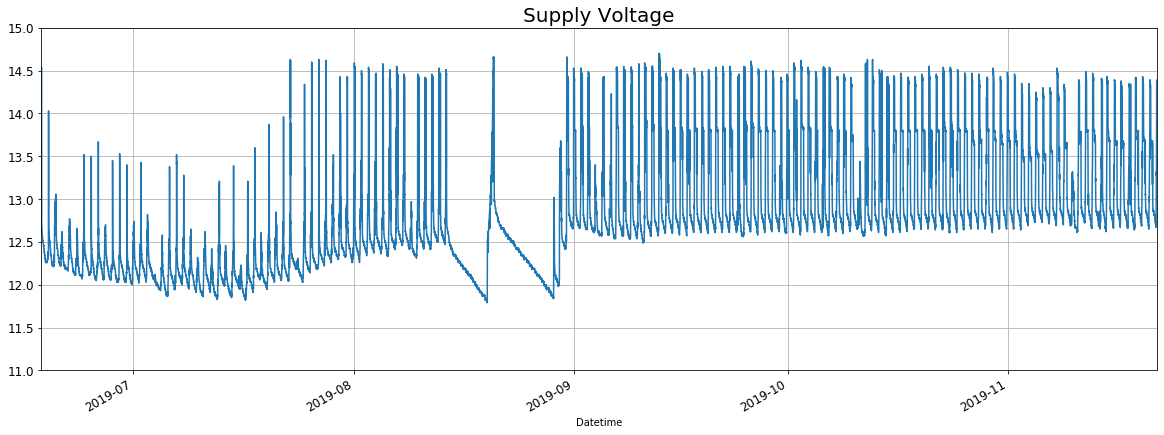

In [34]:
vol = data['SupplyVolts'].plot(figsize=(20,7), title='Supply Voltage', label='supply volts', fontsize=12)
#data['LithiumVolts'].plot(ax=vol, label='lithium volts')
vol.title.set_size(20)
vol.grid()
vol.set_ylim(11,15)
# vol.set_ylabel("Voltage")
# vol.legend(loc='best')

In [35]:
fig = vol.get_figure()
fig.savefig(directory+'field_logger_voltage.png', dpi=100, bbox_inches='tight')

**Temperatures**

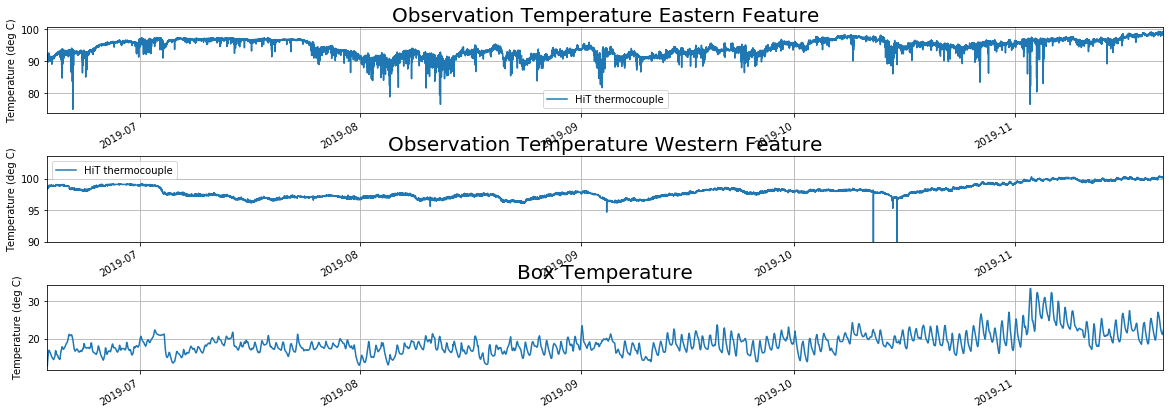

In [38]:
if directory == './UpperTama/':
    fig,(ax0,ax1) = plt.subplots(2, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    #PRT sensor
    data['Temp_PRT_degC'].plot(ax=ax0, title='Observation Temperature', label='PRT')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.set_ylim(bottom=0)
    
    #CS456 sensor
    data['Temp_CS456_degC'].plot(ax=ax0, label='CS456')
    ax0.legend(loc='best')
    
    #box temperatures
    data['PTemp_degC'].plot(ax=ax1, title='Box Temperature', label='logger')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')
    
elif directory == './Fumarole13/':
    fig,(ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    #feature 1, eastern
    data['Temp_thermocouple1_degC'].plot(ax=ax0, title='Observation Temperature Eastern Feature', label='HiT thermocouple')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.legend(loc='best')
    
    #feature 2, western
    data['Temp_thermocouple2_degC'].plot(ax=ax1, title='Observation Temperature Western Feature', label='HiT thermocouple')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=90)
    ax1.legend(loc='best')
    
    #box and air temperatures
    data['PTemp_degC'].plot(ax=ax2, title='Box Temperature', label='logger')
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel('Temperature (deg C)')
    ax2.set_xlabel('')
    
#     data['Temp_thermocouple1_degC'].plot(ax=ax2, label='box thermocouple')
#     ax2.legend(loc='best')
    
elif directory == './UpperTeMaari/':
    fig,(ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['Temp_thermocouple2_degC'].plot(ax=ax0, title='Temperature Eastern Feature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
#     ax0.set_ylim(bottom=30)
    
    data['Temp_thermocouple1_degC'].plot(ax=ax1, title='Temperature Southern Feature')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_ylim(bottom=90)
        
    data['PTemp_degC'].plot(ax=ax2, title='Box Temperature')
    ax2.title.set_size(20)
    ax2.grid()
    ax2.set_ylabel('Temperature (deg C)')
    ax2.set_xlabel('')
    
elif directory == './LowerTeMaari/':
    fig,(ax0, ax1) = plt.subplots(2, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    data['Temp_thermocouple1_degC'].plot(ax=ax0, title='Observation Temperature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    ax0.set_ylim(40,60)

    data['PTemp_degC'].plot(ax=ax1, title='Box Temperature')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('') 
    
elif directory == './FoxLandslide/':
    fig,(ax0) = plt.subplots(1, 1, figsize=(20,3.5))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['PTemp_degC'].plot(ax=ax0, title='Box Temperature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')
    
elif directory == './RuapehuCraterLake/':
    fig,(ax0, ax1) = plt.subplots(2, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    data['Temp_thermocouple1_degC'].plot(ax=ax0, title='Observation Temperature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')

    data['PTemp_degC'].plot(ax=ax1, title='Box Temperature')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('')   

else:
    fig,(ax0,ax1) = plt.subplots(2, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    data['Temp_PRT_degC'].plot(ax=ax0, title='Observation Temperature')
    ax0.title.set_size(20)
    ax0.grid()
    ax0.set_ylabel('Temperature (deg C)')
    ax0.set_xlabel('')

    data['PTemp_degC'].plot(ax=ax1, title='Box Temperature')
    ax1.title.set_size(20)
    ax1.grid()
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xlabel('');

fig.savefig(directory+'field_logger_temperature.png', dpi=100, bbox_inches='tight')

**Depth**

In [ ]:
if (directory == './Inferno/'):
    dep = data['Depth_USGS_OTT_meters'].plot(figsize=(20,7), title='Water Depth Above Sensor',fontsize=12)
    dep.title.set_size(20)
    dep.grid()
    dep.set_ylabel("Depth (m)")
    dep.set_ylim(top=11, bottom=0)
    
elif (directory == './RuapehuCraterLake/'):
    dep = data['Depth_USGS_OTT_meters'].plot(figsize=(20,7), title='Water Depth Above Sensor',fontsize=12)
    dep.title.set_size(20)
    dep.grid()
    dep.set_ylabel("Depth (m)")
    dep.set_ylim(top=1.5, bottom=0.5)
    
elif (directory == './UpperTama/'):
    dep = data['Depth_CS456_meters'].plot(figsize=(20,7), title='Water Depth Above Sensor',fontsize=12)
    dep.title.set_size(20)
    dep.grid()
    dep.set_ylabel("Depth (m)")
    dep.set_ylim(top=1.25, bottom=0.5)

    fig = dep.get_figure()
    fig.savefig(directory+'field_logger_depth.png', dpi=100, bbox_inches='tight')

In [ ]:
if directory == './Inferno/':
    data[data['Depth_USGS_OTT_meters']>12]

**Rainfall**

In [ ]:
if (directory == './FoxLandslide/'):
    fig,(ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(20,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax0.vlines(data.index, ymax=data['Rain1_mm_Tot'], ymin=0, color='blue')
    ax0.set_ylabel('Rainfall (mm)')
    ax0.set_title('Rainfall Sensor 1')
    ax0.title.set_size(20)
    ax0.grid()

    ax1.vlines(data.index, ymax=data['Rain2_mm_Tot'], ymin=0, color='blue')
    ax1.set_ylabel('Rainfall (mm)')
    ax1.set_title('Rainfall Sensor 2')
    ax1.title.set_size(20)
    ax1.grid()
    
    #daily rainfall totals
    daily = data['Rain1_mm_Tot'].resample('D').sum()
    ax2.vlines(daily.index, ymax=daily, ymin=0, color='blue')
    ax2.set_ylabel('Rainfall (mm)')
    ax2.set_title('Rainfall Sensor 1, Daily Total (UTC Day)')
    ax2.title.set_size(20)
    ax2.grid()

    fig.savefig(directory+'field_logger_rain.png', dpi=100, bbox_inches='tight')

**Position**

In [ ]:
if (directory == './FoxLandslide/'):
    colors = np.arange(data.shape[0])
    
    data['longitude'] = data['longitude_a'] + data['longitude_b']/60
    data['latitude'] = data['latitude_a'] + data['latitude_b']/60
    
    medlon = data.longitude.median()
    medlat = data.latitude.median()
    halfrange = 0.0002
    latmin = medlat - halfrange
    latmax = medlat + halfrange
    lonmin = medlon - halfrange
    lonmax = medlon + halfrange
    
    fig = plt.figure(figsize=(10,10))
#     plt.plot(data['longitude'], data['latitude'], marker='None', color=colors, alpha=0.2)
    plt.scatter(data['longitude'], data['latitude'], c=colors, edgecolors='None', s=5, cmap='cool')
    plt.colorbar(label='Data point order')

    plt.title('Apparent Position of Datalogger')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    
    plt.xlim(lonmin, lonmax)
    plt.ylim(latmin, latmax)

    fig.savefig(directory+'field_logger_position.png', dpi=100, bbox_inches='tight')